<h1> Represnting Data and Engineering Features </h1>

# <b>Catagorical Data

## One-Hot-Encoding (Dummy Variable)

we can use both pandas and scikit-learn

### Pandas

In [1]:
import pandas as pd
# The file has no heads naming the columns, so we pass header=None
# and provide the column names explicity in "names"
data = pd.read_csv("adults.csv", header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 
                         'education-num','marital-status', 'occupation',
                         'relationship', 'race', 'gender',
                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                         'income'])
# For illustration purposes, we only select some of the columns
data = data[['age','workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


There is a very simple way to encode the data in pandas, using the get_dummies function.

In [3]:
print("Original feature:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data, dtype=int)
print("feature after get_dummies:\n", list(data_dummies.columns))

Original feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

feature after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In this case, we extract only the columns containing features-that is, all columns from age to occupation_ Transport-moving. This range contains all the features but not the larget:

In [5]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract Numpy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (32561, 44), y.shape: (32561,)


### scikit-learn

Now the data is represnted in a way that scikit-learn can work with and we can proceed as usual:

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f"Test score: {logreg.score(X_test, y_test)}")

Test score: 0.8069033288293821


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


we also can use one hot encoding from sklearn which i think more better efficient

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
data = pd.read_csv('adults.csv')
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                         'education-num','marital-status', 'occupation',
                         'relationship', 'race', 'gender',
                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                         'income'] 
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'income']]
display(data)

,age,workclass,education,gender,hours-per-week,income
0,50,Self-emp-not-inc,Bachelors,Male,13,<=50K
1,38,Private,HS-grad,Male,40,<=50K
2,53,Private,11th,Male,40,<=50K
3,28,Private,Bachelors,Female,40,<=50K
4,37,Private,Masters,Female,40,<=50K
...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Female,38,<=50K
32556,40,Private,HS-grad,Male,40,>50K
32557,58,Private,HS-grad,Female,40,<=50K
32558,22,Private,HS-grad,Male,20,<=50K


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, 'age':'hours-per-week'], data.income)
encoder= OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
X_catagory = ['workclass', 'education', 'gender']
y_catagory = ['income']
X_encoder = encoder.fit(X_train[X_catagory])
X_train_dummies = X_encoder.transform(X_train[X_catagory])
X_test_dummies = X_encoder.transform(X_test[X_catagory])
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_encoder = encoder.fit(y_train)
y_train_dummies = y_encoder.transform(y_train)
y_test_dummies = y_encoder.transform(y_test)


In [9]:
display(X_train_dummies.head())
display(y_train_dummies.head())

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Female,gender_ Male
19977,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6844,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
890,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3815,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17230,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,x0_ <=50K,x0_ >50K
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [10]:
X_train = pd.concat([X_train, X_train_dummies], axis=1).drop(columns = X_catagory)
X_test = pd.concat([X_test, X_test_dummies], axis =1).drop(columns=X_catagory)

In [11]:
y_train = y_train_dummies.drop(columns=['x0_ <=50K'])
y_test = y_test_dummies.drop(columns=['x0_ <=50K'])

In [12]:
display(X_train, y_train)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,gender_ Female,gender_ Male
19977,20,30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6844,58,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
890,35,40,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3815,29,35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17230,58,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,38,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19149,41,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18271,80,30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12410,25,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,x0_ >50K
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24415,0.0
24416,0.0
24417,0.0
24418,0.0


## Numbers can Encode Categoricals

In [13]:
#create a DataFrame with a integer feature and a categorical string freature
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1], 
                        'categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [14]:
pd.get_dummies(demo_df, dtype=int)

,Integer Feature,categorical Feature_box,categorical Feature_fox,categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [15]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'categorical Feature'], dtype = int)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,categorical Feature_box,categorical Feature_fox,categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Binning, Discretization, Linear Models, and Trees

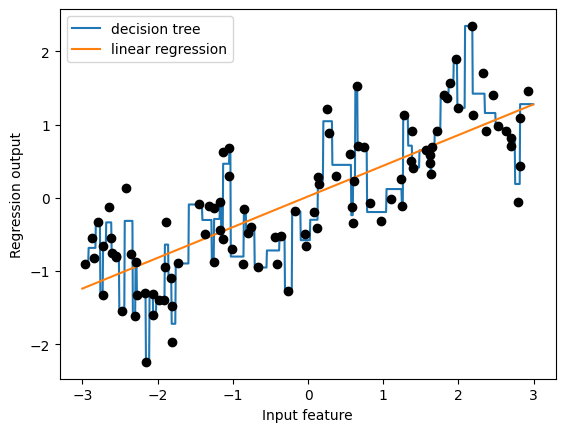

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [17]:
bins = np.linspace(-3,3,11)
print(f"bins:{bins}")

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [18]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin memebership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin memebership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [19]:
from sklearn.preprocessing import OneHotEncoder
# transform using the One Hot Encoder
encoder = OneHotEncoder(sparse_output=False)
# encoder.fit finds the unique values that aprea in which bin ecoder.fit(which+ben)
encoder.fit(which_bin)
# transform createss the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
print(f"X_binned.shape: {X_binned.shape}")

X_binned.shape: (100, 10)


Now we build a new linear regression model and a new dicision tree model on the one-hot-encoded data. The result is visualized in Figure 4-2, together with the bin boundaries, shown as dotted black lines:

Text(0.5, 0, 'Input feature')

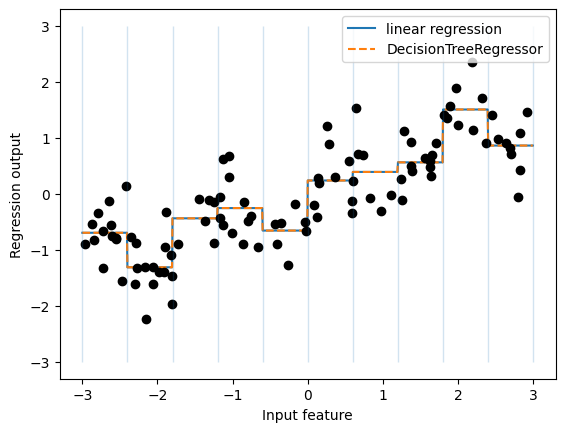

In [21]:
line_binded = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binded), label='linear regression ')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binded), '--', label='DecisionTreeRegressor')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

# Interaction and Polynomials

In [22]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


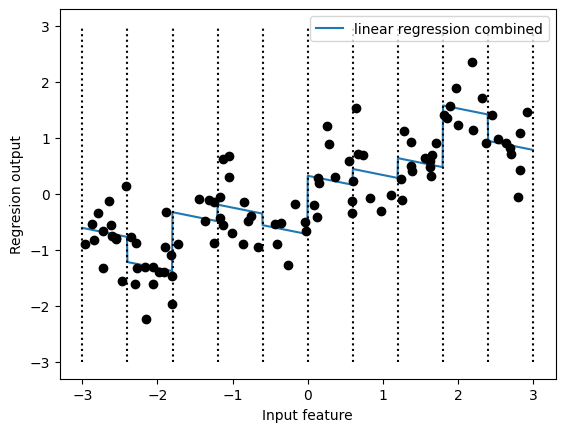

In [23]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binded])
plt.plot(line, reg.predict(line_combined), label = "linear regression combined")

for bin in bins:
    plt.plot([bin,bin], [-3,3], ':', c='k')

plt.legend()
plt.ylabel("Regresion output")
plt.xlabel("Input feature")
plt.plot(X[:,0], y, 'o', c='k')

In [24]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(100, 20)


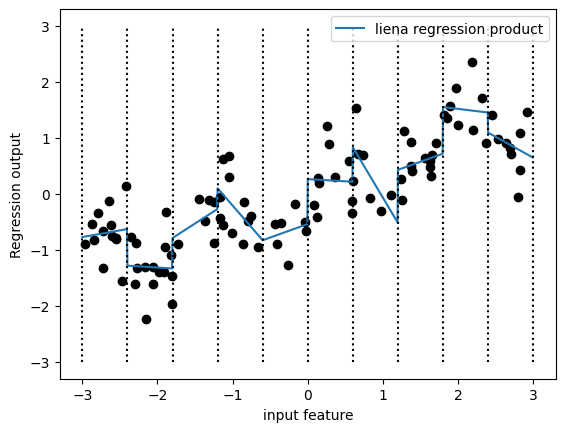

In [25]:
reg = LinearRegression().fit(X_product,y)
line_product = np.hstack([line_binded, line * line_binded])
plt.plot(line, reg.predict(line_product), label = 'liena regression product')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':',c='k')

plt.scatter(X, y, c='k')
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x**10
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [27]:
print(f"X_poly.shape: {X_poly.shape}")

X_poly.shape: (100, 10)


In [28]:
print("Entries of X:\n\n",X[:5])

print("\nEntries of X_poly:\n\n",X_poly[:5])


Entries of X:

 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Entries of X_poly:

 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [29]:
print("Polynomial featre names:\n", poly.get_feature_names_out())

Polynomial featre names:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


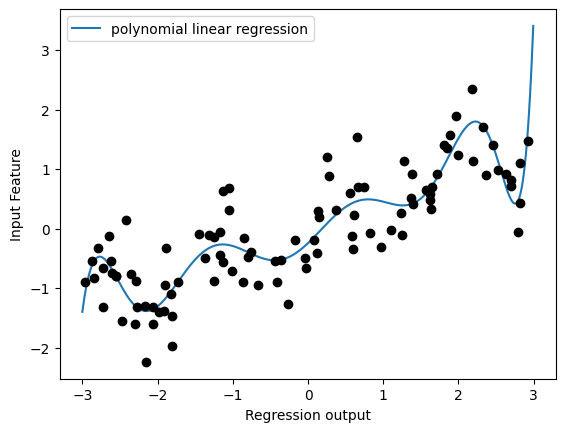

In [30]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'polynomial linear regression')
plt.plot(X[:,0], y, 'o', c='k')
plt.xlabel("Regression output")
plt.ylabel("Input Feature")
plt.legend(loc='best')
plt.show()

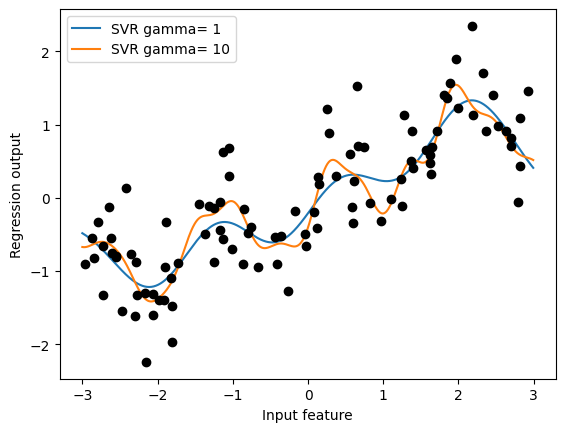

In [31]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma= {gamma}')

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')


In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
poly = PolynomialFeatures(degree=3).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")

X_train.shape: (15480, 8)
X_train_poly.shape: (15480, 165)


In [34]:
print(f"Polynomial Feature names:\n{poly.get_feature_names_out()}")

Polynomial Feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2' 'x0^3' 'x0^2 x1' 'x0^2 x2'
 'x0^2 x3' 'x0^2 x4' 'x0^2 x5' 'x0^2 x6' 'x0^2 x7' 'x0 x1^2' 'x0 x1 x2'
 'x0 x1 x3' 'x0 x1 x4' 'x0 x1 x5' 'x0 x1 x6' 'x0 x1 x7' 'x0 x2^2'
 'x0 x2 x3' 'x0 x2 x4' 'x0 x2 x5' 'x0 x2 x6' 'x0 x2 x7' 'x0 x3^2'
 'x0 x3 x4' 'x0 x3 x5' 'x0 x3 x6' 'x0 x3 x7' 'x0 x4^2' 'x0 x4 x5'
 'x0 x4 x6' 'x0 x4 x7' 'x0 x5^2' 'x0 x5 x6' 'x0 x5 x7' 'x0 x6^2'
 'x0 x6 x7' 'x0 x7^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4' 'x1^2 x5'
 'x1^2 x6' 'x1^2 x7' 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x2 x5' 'x1 x2 x6'
 'x1 x2 x7' 'x1 x3^2' 'x1 x3 x4' 'x1 x3 x5' 'x1 x3 x6' 'x1 x3 x7'
 'x1 x4^2' 'x1 x4 x5' 'x1 x4 x6' 'x1 x4 x7' 'x1 x5^2' 'x1 x5 x6'
 'x1 x5 

In [35]:
from sklearn.linear_model import Ridge
r = Ridge().fit(X_train_scaled, y_train)
print(f"Score without interactions: {r.score(X_train_scaled, y_train)}")
r = Ridge().fit(X_train_poly, y_train)
print(f"Scores with the interaction: {r.score(X_train_poly, y_train)}")

Score without interactions: 0.605706670059116


Scores with the interaction: 0.6469800130246202


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print(f"Score without interactions: {rf.score(X_test_scaled, y_test)}")
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print(f"Score with interactions: {rf.score(X_test_poly, y_test):.3f}")

Score without interactions: 0.7953294763144849
Score with interactions: 0.807


Even without additional features, the random forest beats the performance of Ridge. Adding interations and polynomials actually decreses performance slightly.

# Univariate Nonlinear Transformations

In [44]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [45]:
print("Number of feature apprearances: \n", format(np.bincount(X[:, 0])))

Number of feature apprearances: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Values')

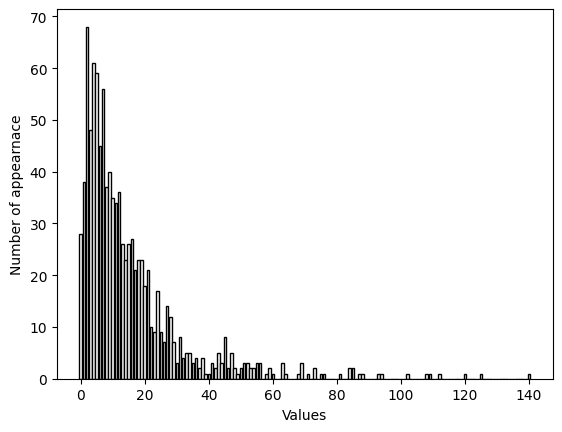

In [60]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'w', edgecolor='k')
plt.ylabel("Number of appearnace")
plt.xlabel("Values")

In [61]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f"Test score: {score:.3f}")

Test score: 0.622


In [62]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Values')

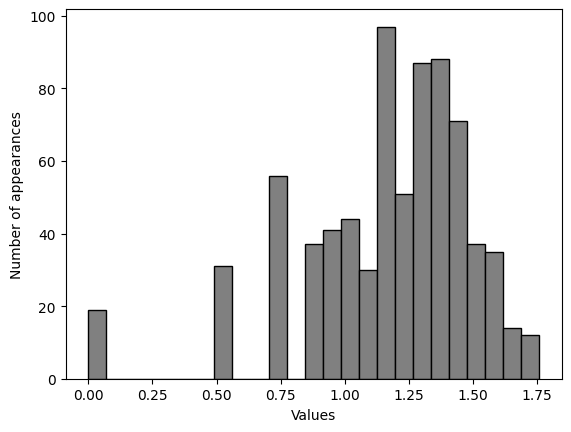

In [64]:
plt.hist(np.log(X_train_log[:,0]+1), bins = 25, color = 'gray', edgecolor='k')
plt.ylabel("Number of appearances")
plt.xlabel("Values")

In [66]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f"Test score {score:.3f}")

Test score 0.875


# Automatic Feature Selection

## Univariate statistics

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get detrministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise feature to the data
# the first 30 feature are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
#transform training set
X_train_selected = select.transform(X_train)
print("X_train.shape ", X_train.shape)
print("X_train_selected.shape ", X_train_selected.shape)

X_train.shape  (284, 80)
X_train_selected.shape  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

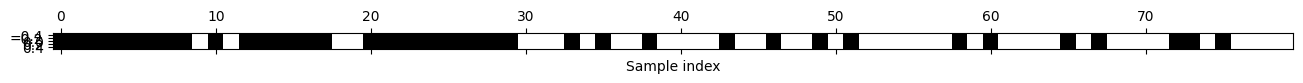

In [79]:
mask = select.get_support()
print(mask)
# visualize the mask --black is True, white is False
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [92]:
from sklearn.linear_model import LogisticRegression
# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Score with all feature: {lr.score(X_test, y_test):.5f}")
lr.fit(X_train_selected, y_train)
print(f"Score with only selected features: {lr.score(X_test_selected, y_test):.5f}")

Score with all feature: 0.91930
Score with only selected features: 0.91579


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

## Model-Based Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(
    n_estimators=100, random_state=42), threshold="median")

In [94]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_l1.shape: {X_train_l1.shape}")

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

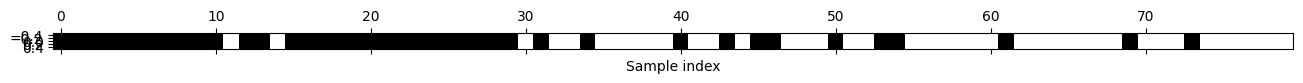

In [95]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [97]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f"Test score {score:.3f}")

Test score 0.930


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Iterative Feature Selection

Text(0.5, 0, 'Sample index')

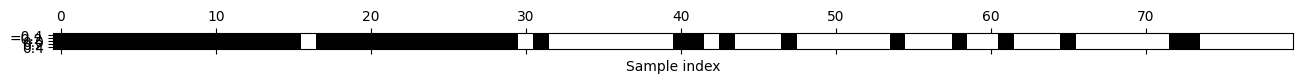

In [98]:
from sklearn.feature_selection import RFE #recursive feature elimination
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")

In [99]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Test score: {score}")

Test score: 0.9333333333333333


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
print(f"Test score: {select.score(X_test, y_test)}")

Test score: 0.9473684210526315


# Utilizing Expert Knowledge

In [117]:
citibike = mglearn.datasets.load_citibike()
print(f"citi bike data: \n\n", citibike.head())

citi bike data: 

 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

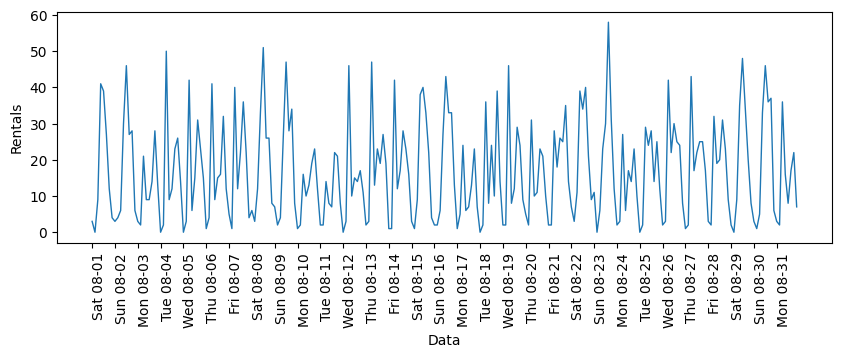

In [119]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("Data")
plt.ylabel("Rentals")

In [122]:
# extract the target values (number of rentals)
y = citibike.values
# convert the time to POSIX time using %save
X = citibike.index.strftime("%s").astype("int").to_numpy().reshape(-1,1)

In [133]:
# use the first 184 data point for training and the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_feature(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(18,3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a, %m-%d"), rotation=90, ha='left')

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    plt.legend(loc=(1.01,0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

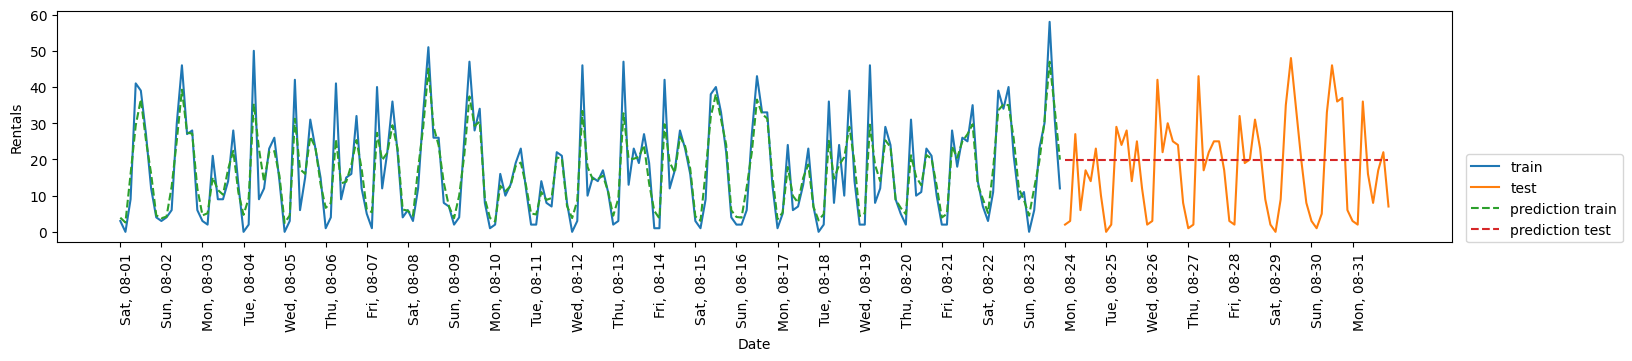

In [134]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_feature(X, y, regressor)

Test-set R^2: 0.60


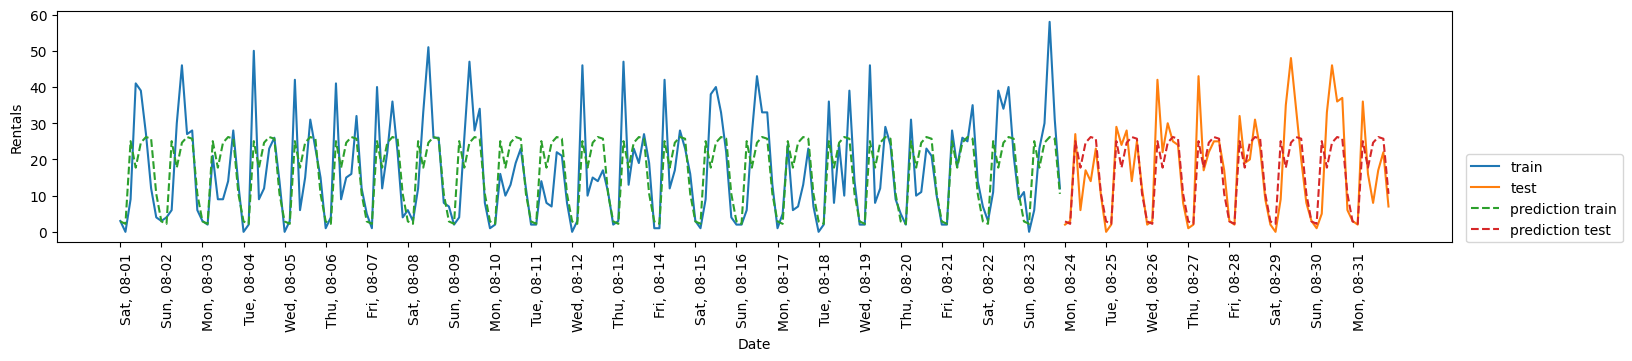

In [135]:
X_hour = citibike.index.hour.to_numpy().reshape(-1,1)
eval_on_feature(X_hour, y, regressor)

Test-set R^2: 0.84


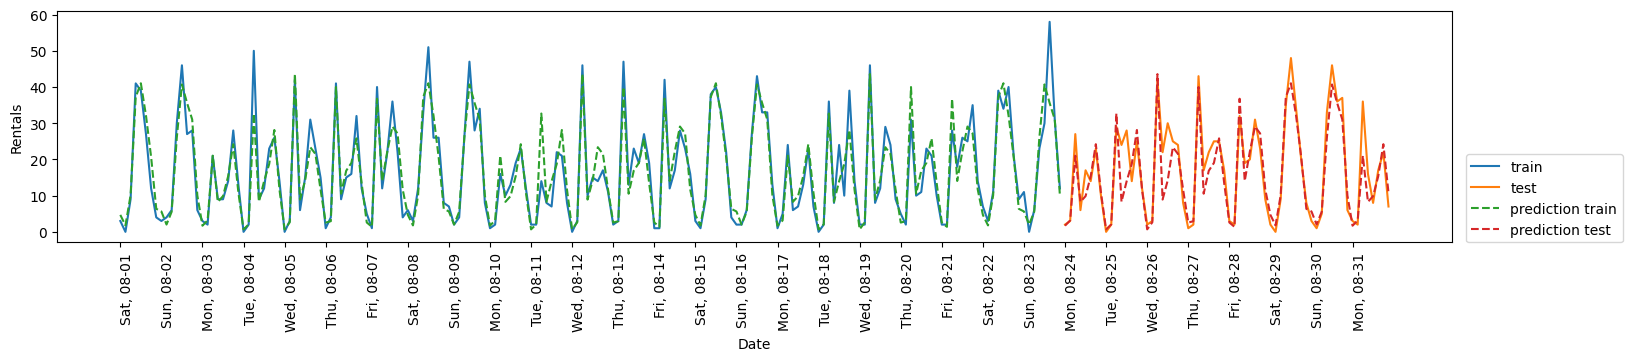

In [137]:
X_hour_week = np.hstack([citibike.index.dayofweek.to_numpy().reshape(-1,1),
                         citibike.index.hour.to_numpy().reshape(-1,1)])
eval_on_feature(X_hour_week, y, regressor)



Test-set R^2: 0.13


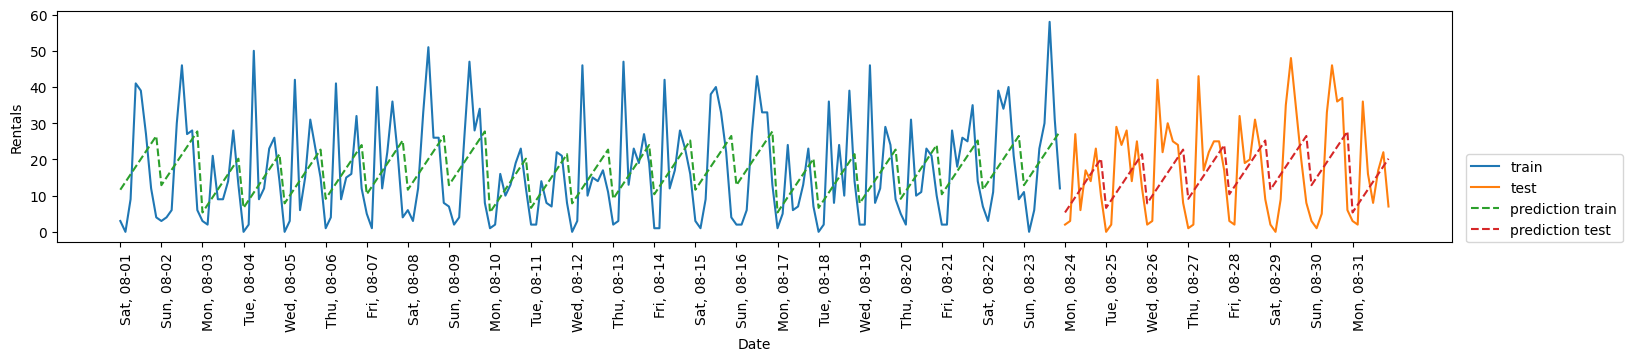

In [142]:
from sklearn.linear_model import LinearRegression
eval_on_feature(X_hour_week, y, LinearRegression())

In [143]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


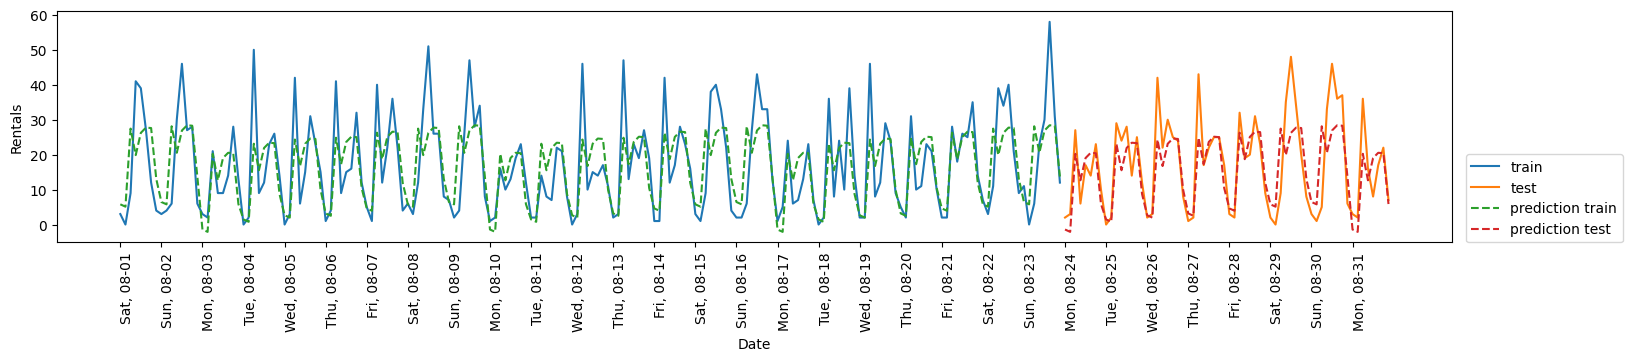

In [147]:
eval_on_feature(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


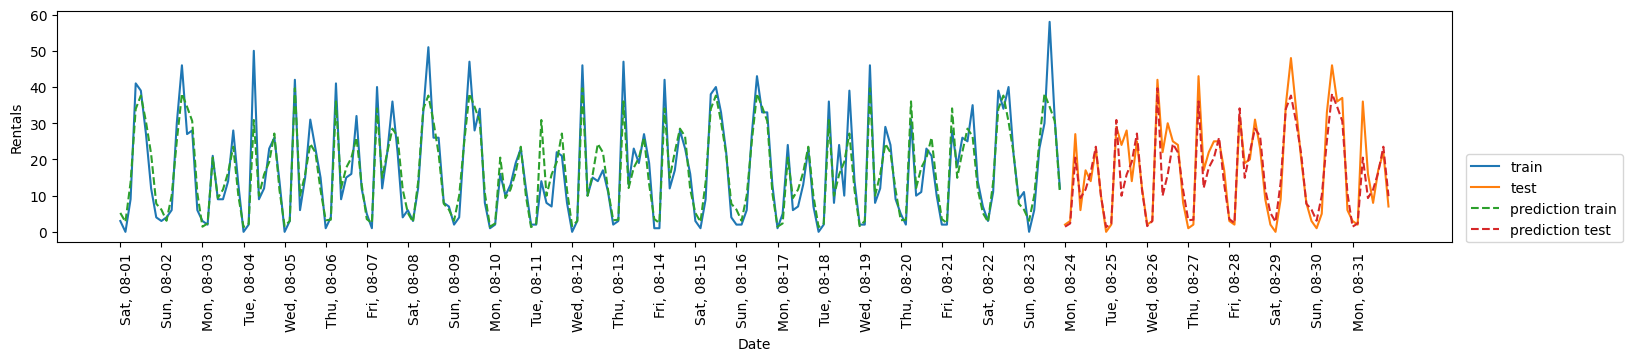

In [150]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_feature(X_hour_week_onehot_poly, y, lr)

In [152]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", 'Sat', 'Sun']
features = day + hour

In [158]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature')

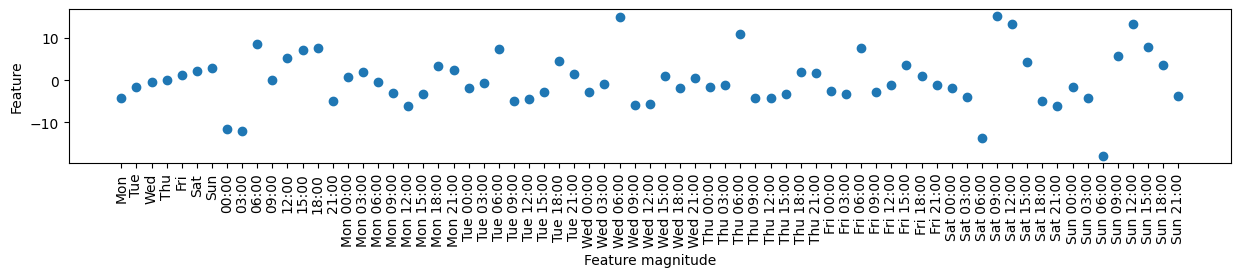

In [159]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")